<div style="height:100px">

<div style="display:inline-block; width:77%; vertical-align:middle;">
    <div>
        <b>Author</b>: <a href="http://pages.di.unipi.it/castellana/">Daniele Castellana</a>
    </div>
    <div>
        PhD student at the Univeristy of Pisa and member of the Computational Intelligence & Machine Learning Group (<a href="http://www.di.unipi.it/groups/ciml/">CIML</a>)
    </div>
    <div>
        <b>Mail</b>: <a href="mailto:daniele.castellana@di.unipi.it">daniele.castellana@di.unipi.it</a>
    </div>
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="https://upload.wikimedia.org/wikipedia/it/7/72/Stemma_unipi.png">
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="http://www.di.unipi.it/groups/ciml/Home_files/loghi/logo_ciml-restyling2018.svg">
</div>
</div>

# Deep Autoencoder

The goal of an autoencoder is to learn a succint representation of the data. The model has two part:
- the **encoder**, which maps the input to a neural encoding
- the **decoder**, which reconstruct the input starting from the encoding

In this example, we train an autoencoder to recognise different digit. The dataset we use is the well known MINST dataset.

Using TensorFlow backend.


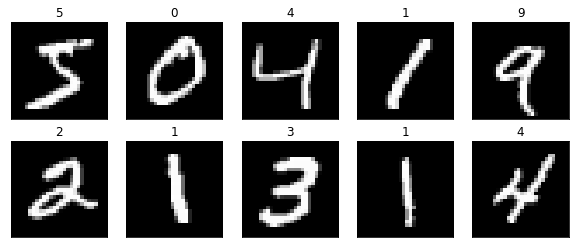

Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n//2, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(y_train[i])
plt.show()

print('Training shape: {}\n'
      'Test shape: {}'.format(x_train.shape,x_test.shape))

In [2]:
#define the autoencoder model
from keras.layers import Input, Dense
from keras.models import Model

def build_autoencoder():

    encoding_dim=32
    input_img = Input(shape=(784,))
    encoder_layer = Dense(encoding_dim, activation='relu')
    decoder_layer = Dense(784, activation='sigmoid')
    
    # WE ARE USING THE MODEL FUNCTIONAL API
    
    # "encoded" is the encoded representation of the input
    encoded = encoder_layer(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = decoder_layer(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoder_layer(input_img))

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # create the decoder model
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder, encoder, decoder


Even if we are dealing with image, they are still flat data! In fact, we can esiliy reshape ech image $28 \times 28$ in a vecotr with $784$ components.

In [3]:
#Vectorize and normalize images
x_train_vec = x_train.astype('float32') / 255.
x_test_vec = x_test.astype('float32') / 255.
x_train_vec = x_train_vec.reshape((len(x_train), -1))
x_test_vec = x_test_vec.reshape((len(x_test), -1))

x_train_vec.shape

(60000, 784)

In [4]:
autoencoder, encoder, decoder = build_autoencoder()

h = autoencoder.fit(x_train_vec, x_train_vec, epochs=20, batch_size=256, shuffle=True).history

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.2735
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1711
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1454
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.1285
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.1181
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1109
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1057
Epoch 8/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1020
Epoch 9/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0994
Epoch 10/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0975
Epoch 11/20
60000/6

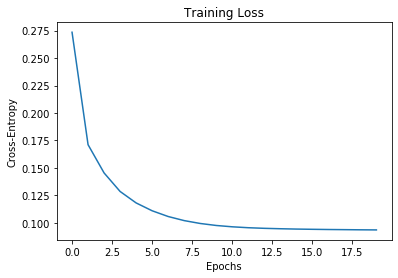

In [5]:
plt.plot(h['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.title('Training Loss');

## Plot reconstructed images

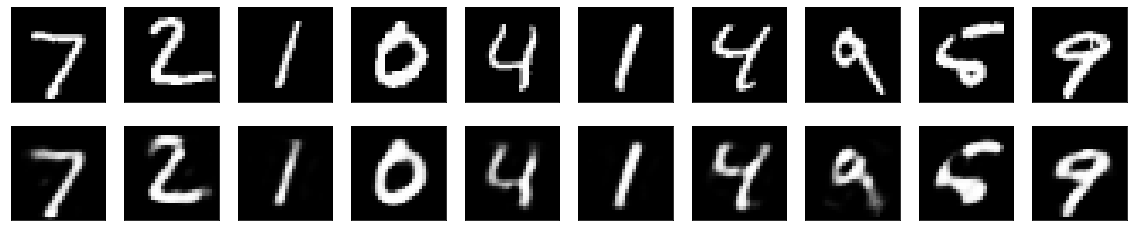

In [7]:
#examples of reconstructed images

# get encoding of the test set
enc_x_test = encoder.predict(x_test_vec)
# reconstruct the images
decoded_x_test = decoder.predict(enc_x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Visualise the encoding

We can visualise the encoding learnt by the model using t-SNE to map them in a 2-d space (see [doc page](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)).

In [8]:
from sklearn.manifold import TSNE

#map in a 2-d space
enc_x_test2 = TSNE(n_components=2, verbose=1).fit_transform(enc_x_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 5.012s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.047663
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.504715
[t-SNE] KL divergence after 1000 iterations: 1.772435


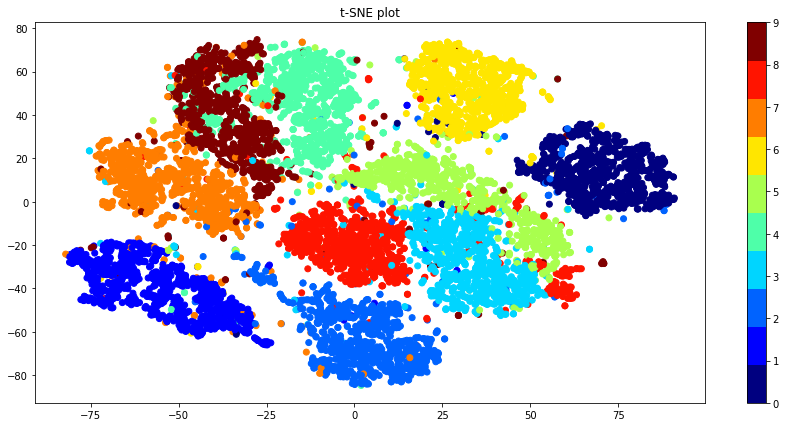

In [9]:
#plot tSNE representations
plt.figure(figsize=(15, 7))

plt.scatter(enc_x_test2[:,0], enc_x_test2[:,1], c=y_test, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.title('t-SNE plot');

## Denoising Autoencoder

We takle the same problem using a denoising autoencoder.

The only differnce is the definition of the function **add_noise()** which add gaussian noise to the training input.

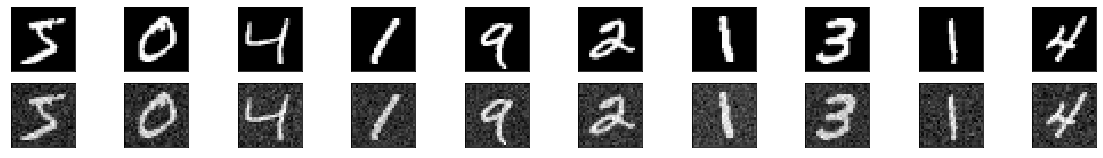

In [10]:
def add_noise(x, std):
    return x + std*np.random.randn(*x.shape)

den_autoencoder, den_encoder, den_decoder = build_autoencoder()

noised_x_train_vec = np.apply_along_axis(add_noise, 0, x_train_vec,std=0.1)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train_vec[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noised image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noised_x_train_vec[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
plt.show()

In [11]:
h_d = den_autoencoder.fit(noised_x_train_vec, x_train_vec, epochs=20, batch_size=256, shuffle=True).history

Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2771
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1740
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1468
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1305
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1205
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1136
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1087
Epoch 8/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1049
Epoch 9/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1021
Epoch 10/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1001
Epoch 11/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0987
Epoch 12/20
60000/60000 [===========================

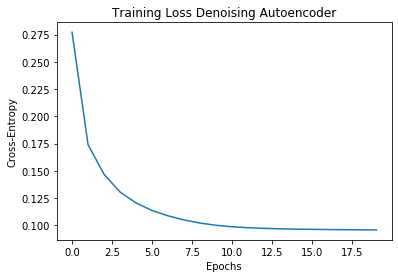

In [12]:
plt.plot(h_d['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.title('Training Loss Denoising Autoencoder');

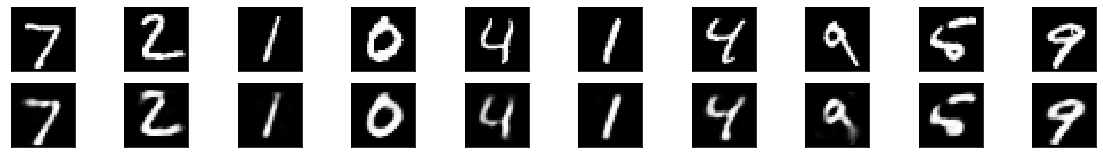

In [13]:
#examples of reconstructed images

# get encodin of the trainining set
enc_x_test_den = den_encoder.predict(x_test_vec)

decoded_x_test_den = den_decoder.predict(enc_x_test_den)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_x_test_den[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
#map in a 2-d space
enc_x_test_den2 = TSNE(n_components=2, verbose=1).fit_transform(enc_x_test_den)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 5.788s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.969766
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.793770
[t-SNE] KL divergence after 1000 iterations: 1.795237


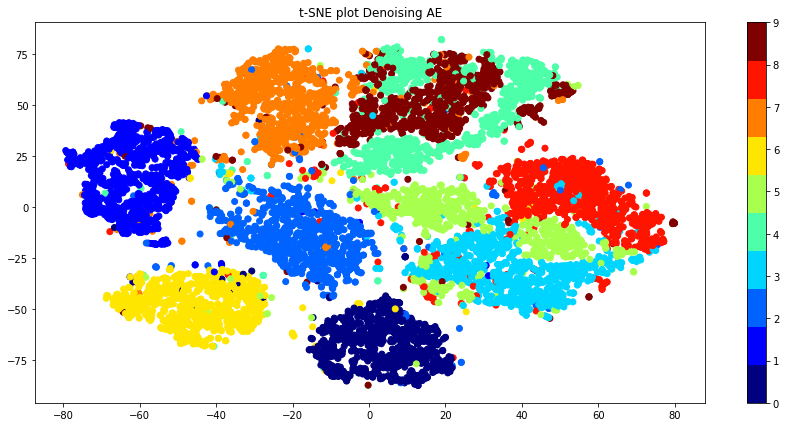

In [15]:
plt.figure(figsize=(15, 7))

plt.scatter(enc_x_test_den2[:,0], enc_x_test_den2[:,1], c=y_test, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.title('t-SNE plot Denoising AE');